In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
folder = "results/"
graph = "graph_9_nodes"

df = pd.read_csv(f"{folder}rank_effect_by_node_{graph}.csv")

In [3]:
df['CVF (Avg)'] = df['CVF In (Avg)'] + df['CVF Out (Avg)']
df['CVF (Max)'] = df['CVF In (Max)'] + df['CVF Out (Max)']

In [4]:
def plot_node_rank_effect(node, df):
    fig, axs = plt.subplots(1, 2, figsize=(10, 3),  constrained_layout=True)

    sns.lineplot(data=df, x='Rank Effect', y='CVF (Avg)', ax=axs[0])
    axs[0].set(xlabel=f"Rank Effect of Node: {node}", ylabel="Count")
    axs[0].set_title("CVF Avg")
    axs[0].set_yscale('log')
    # axs[0].set_ylim(ymin=0)
    
    sns.lineplot(data=df, x='Rank Effect', y='CVF (Max)', ax=axs[1])
    axs[1].set(xlabel=f"Rank Effect of Node: {node}", ylabel="Count")
    axs[1].set_title("CVF Max")
    axs[1].set_yscale('log')

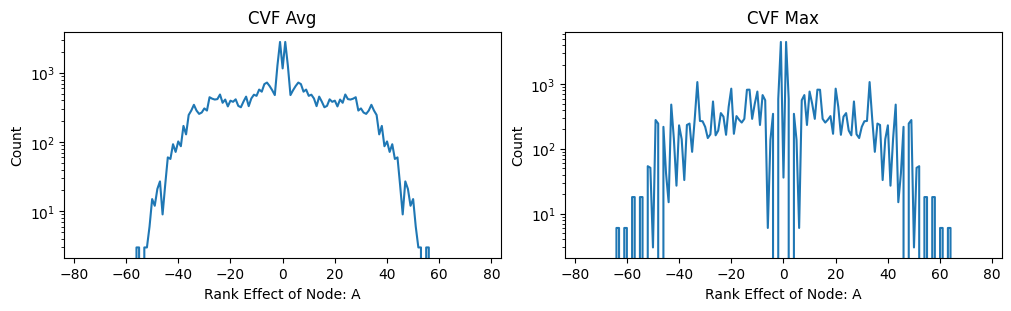

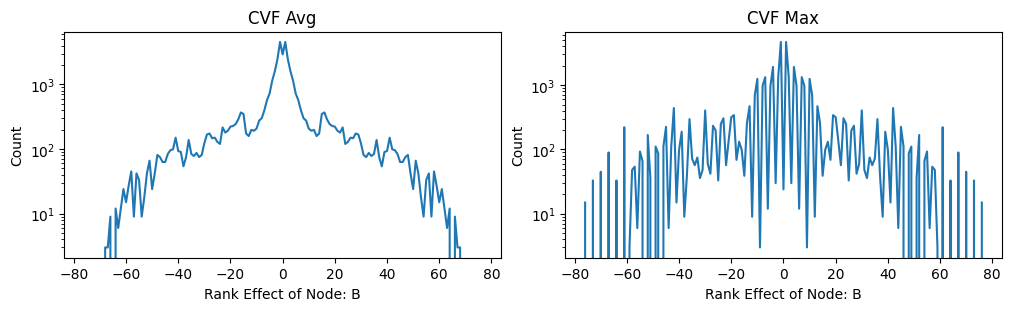

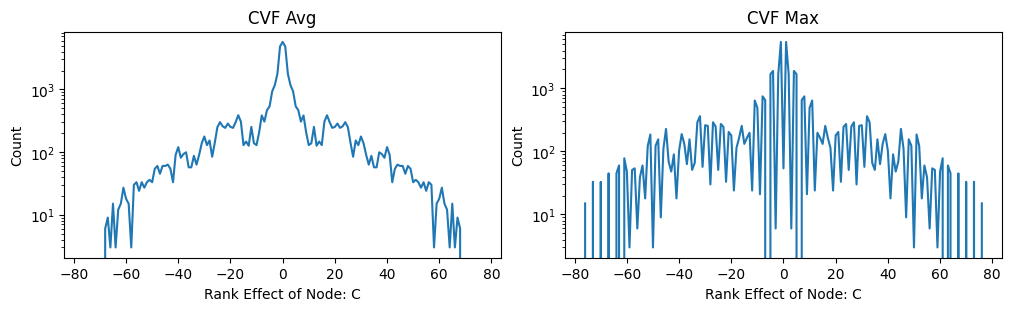

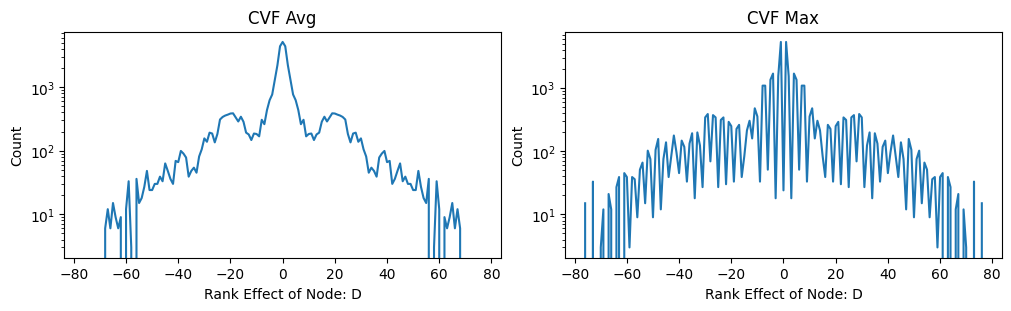

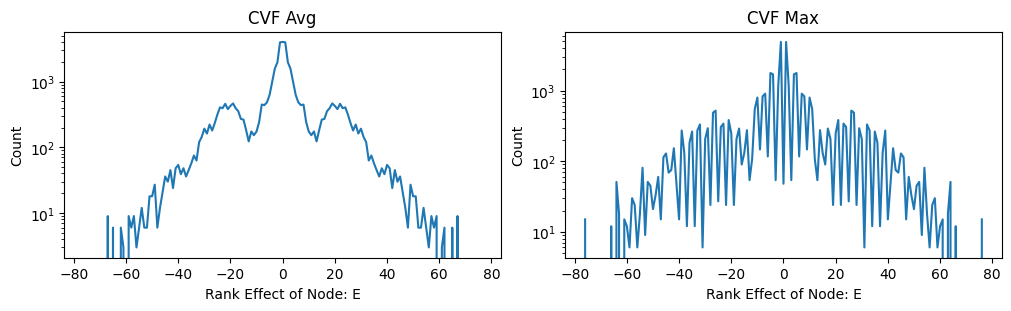

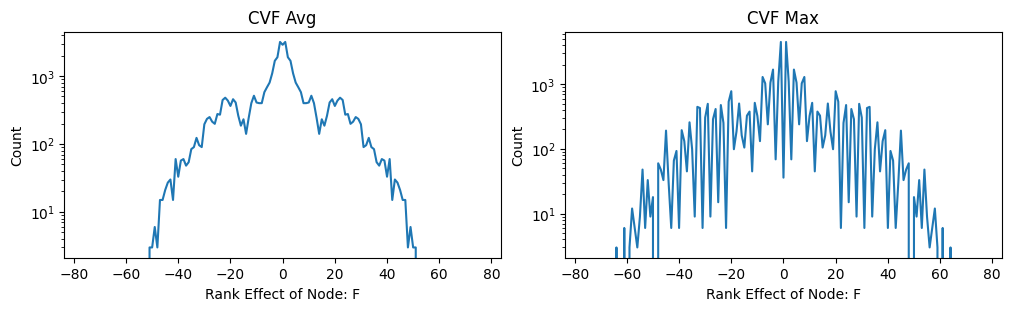

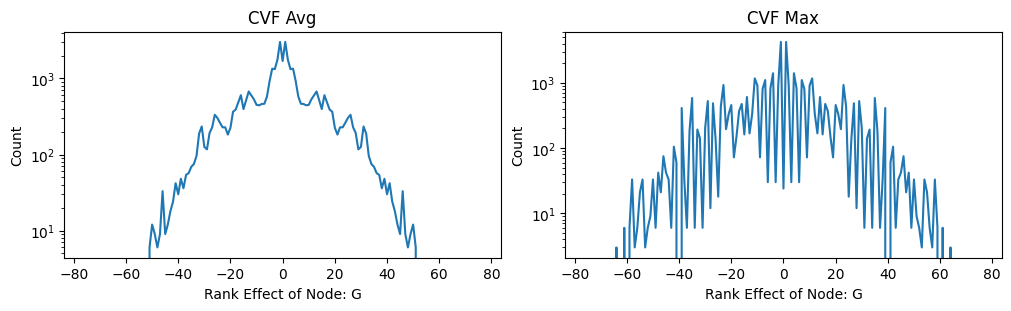

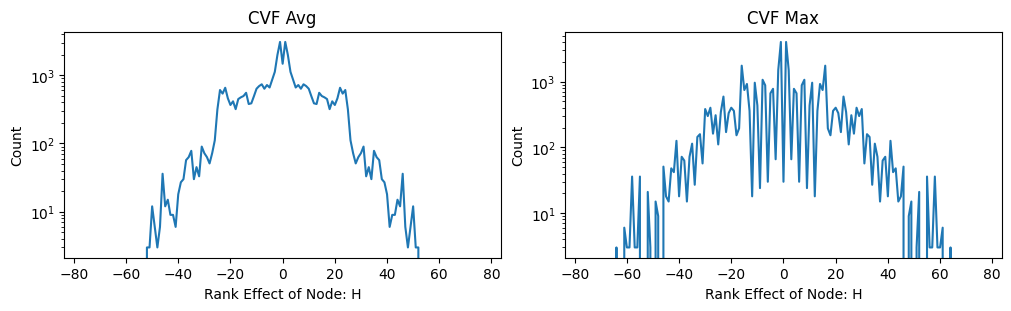

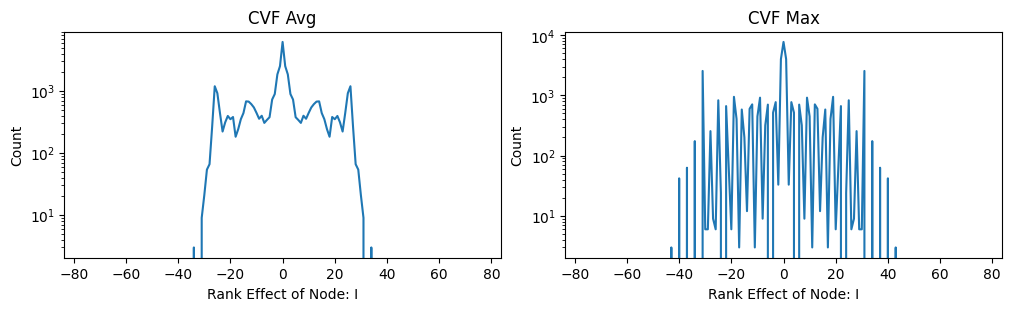

In [5]:
for index, grp in df.groupby(['Node']):
    plot_node_rank_effect(index[0], grp)
    # break